# Assignment 3: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_3_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [0]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/sjp1136/ds/master/Datasets/housing.csv'
data = pd.read_csv(url).dropna()
data.index = range(len(data))

print(data.head(0))
num_data = data[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]]
cat_data = data.drop(["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"], axis=1)


cat_encoder = OneHotEncoder(sparse=False)
cat_1hot = cat_encoder.fit_transform(cat_data)
# print(cat_1hot.shape)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)
# print(scaled_data.shape)

trans_data = scaled_data 

# trans_data = np.append(scaled_data, cat_1hot,1)
print("Trans_data: ", trans_data.shape)
print("Data: ", data.shape)

# trans_data

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []
Trans_data:  (20433, 9)
Data:  (20433, 10)


- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

Euclidean Distance Measure was used!

In [0]:
import statistics

%matplotlib inline
import matplotlib.pyplot as plt
# Questions
# 1) What to do for categoricals
# 2) How do compare categoricals
# 3) Take the average of all values? Or take the average of each individual feature? 
# 4) What should my function be returning? 
# 5) How long does this take to run?
# create an array that maps each sample to the cluster at the end

# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

# Scaling the data
def manhattan(data_1, data_2):
  sum = 0.0 
  for x in range(len(data_1)):
    sum += (abs(data_1[x] - data_2[x]))
  return sum

def euclidean(data_1, data_2):
  sum = 0.0 
  for x in range(len(data_1)):
    sum += (data_1[x] - data_2[x])**2
  return sum**0.5

def sup(data_1, data_2):
  max = 0.0 
  for x in range(len(data_1)):
    max = abs(data_1[x] - data_2[x]) if max < abs(data_1[x] - data_2[x]) else max
  return max

def kmeans(trans_data, k): 
  cluster_data = {}
  
  step = 0
  for i in range(k):
    #datapoints and centroids
    cluster_data[i] = ([], np.random.normal(size=9))
  converged = False

  while not converged:
    datapoints_index = [[] for i in range(k)]
    datapoints = [[] for i in range(k)]

    # Allocating points to centroids
    for i in range(len(trans_data)):
      m = 1000000
      index = 0
      for key in cluster_data:
        distance = euclidean(trans_data[i], cluster_data[key][1])
        if distance < m:
          m = distance 
          index = key
      datapoints_index[index].append(i)
      datapoints[index].append(trans_data[i])
    
    datapoints = np.array(datapoints)
    for key in cluster_data:
      cluster_data[key] = (datapoints[key], cluster_data[key][1])
  
    # Recalculating mean of centroids
    converged = True 
    for x in range(len(datapoints)):
      # Go through each column
      temp = [statistics.mean(np.array(datapoints[x])[:,y]) for y in range(np.array(datapoints[x]).shape[1]) ]
      # print("temp:", temp)
      # print("cluster_data[x]:", cluster_data[x][1])
      if not temp == list(cluster_data[x][1]):
        converged = False
      cluster_data[x] = (datapoints[x], temp)
    step += 1
    # print(step)
  return cluster_data, datapoints_index #clusters of data in the dataset which are similar to one another

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Change k from 2 to 10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


In [0]:
def sum_squared_error(cluster_data):
  result = []
  for c_index in range(len(cluster_data[0])):
    c_mean = cluster_data[0][c_index][1]
    sum_squared = 0
    for sample in cluster_data[0][c_index][0]:
        sum_squared += (sample - c_mean)**2
    result.append(sum_squared)
  return result

def find_mean(cluster_data):
  result = []
  for c_index in range(len(cluster_data[0])):
    std = []
    for column in range(len(cluster_data[0][c_index][0][0])):
      std.append(np.mean(np.array(cluster_data[0][c_index][0])[:,column]))
    result.append(std)
  return result 

  return result
  
def std_dev(cluster_data):
  result = []
  for c_index in range(len(cluster_data[0])):
    std = []
    for column in range(len(cluster_data[0][c_index][0][0])):
      std.append(np.std(np.array(cluster_data[0][c_index][0])[:,column]))
    result.append(std)
  return result 

def plot_scatter(data, all_data):
  data["cluster_index"] = [0 for i in range(len(data))]

  s={}
  for cluster_index in range(len(all_data[1])):
    # print(cluster_index)
    if cluster_index not in s:
      s[cluster_index] = 0
    for data_index in all_data[1][cluster_index]:
      s[cluster_index] += 1
      data["cluster_index"][data_index] = cluster_index

  # print(data["cluster_index"])
    
  #Plotting 
  data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
      # s=cluster_index, label="cluster_index", 
      figsize=(10,7), c="cluster_index", cmap=plt.get_cmap("jet"), colorbar=True,
      sharex=False)
  plt.legend()

## K = 2
For k = 2, the standard deviations are on the upper side, which means that there are relatively weak intra-cluster connections. This may be that there are distinctive areas in California, but with k = 2, the areas are simply being generalized into two areas, North and South. For k > 3, the clusters are correlative to the cities and areas in California, in that some represent the Silicon Valley, San Francisco, San Diego, etc. For k = 2, the northern and southern parts of California are strictly divided, location wise (this division remains for all k, except k = 8 to 10, where the southern becomes more scattered), as well as according to other features. This could be attributed to the fact that the Southern part of California is wealthier with Hollywood, Belverly Hills, etc., more diverse areas. So there may have been larger difference in correlated economical features such as total_rooms, total_bedrooms, population, households, median_income, and median_house_value.

Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity
Sum-squared error:
Cluster  1 :  [1957.47327332 1973.35267793 9546.96527939 4204.84444847 4423.65889143
 4172.15800798 4741.69066445 8309.62691758 9022.04150644]
Cluster  2 :  [ 1887.271319    1223.36810609 10862.55013583 16031.943608
 15676.27344915 15720.50384936 15356.70979489 12074.17710995
 11220.72193771]
Average of SSE:  8244.740609832405
Standard Deviation:
Cluster  1 :  [0.47444749173595824, 0.47636800994950274, 1.0477867592436407, 0.6953688014738162, 0.7132323776282934, 0.6926607970418749, 0.7384257684471173, 0.9775320315809161, 1.0185741374636725]
Cluster  2 :  [0.4009946862915765, 0.3228494305399234, 0.9620271853459883, 1.1687309256133205, 1.1556940116854197, 1.1573232510338936, 1.143853844849442, 1.0142621495937494, 0.9777590576365867]
Average of ST. D:  0.8409939287308161
Mean:
Cluster  1 :  [-1.0467743591705332, 1.06702

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


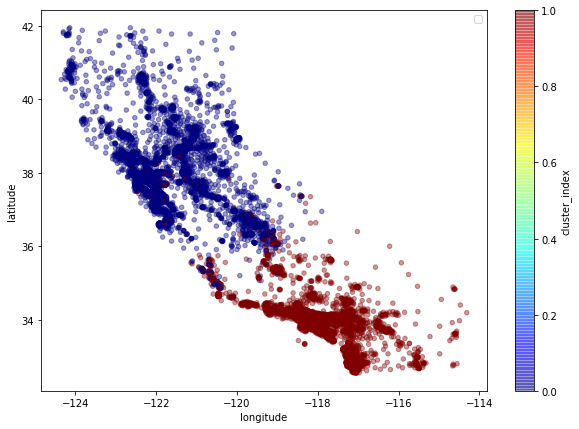

In [0]:
all_data = kmeans(trans_data, 2)
x = sum_squared_error(all_data)
y = std_dev(all_data)
z = find_mean(all_data)

print("Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity")
print("Sum-squared error:")
s = 0
for i in range(len(x)):
  print("Cluster ", str(i+1), ": ", x[i])
  s+=sum(x[i])
print("Average of SSE: ", str(s/(9*len(x))))

print("Standard Deviation:")
s = 0
for i in range(len(y)):
  print("Cluster ", str(i+1), ": ", y[i])
  s+=sum(y[i])
print("Average of ST. D: ", str(s/(9*len(y))))

print("Mean:")
s = 0
for i in range(len(z)):
  print("Cluster ", str(i+1), ": ", z[i])
  s+=sum(z[i])
print("Average of Mean: ", str(s/(9*len(z))))

plot_scatter(data, all_data)

## K = 3

Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity
Sum-squared error:
Cluster  1 :  [1805.91134454 1794.89599539 8910.93831411 2203.91649045 2350.00641122
 2292.14696929 2480.68833785 7898.51276099 8544.50906182]
Cluster  2 :  [ 1433.10784162   847.98113238  9021.19435595  2638.15605293
  3000.14508156  3480.11510801  2984.19332535 10926.85252137
 10194.11405882]
Cluster  3 :  [1592.29670638 1379.39532859  863.36604549 5360.71816282 4252.37153318
 5368.62145977 4186.75855956 1503.97936502 1497.18886728]
Average of SSE:  4030.077081175195
Standard Deviation:
Cluster  1 :  [0.47009327041012944, 0.4686573854195734, 1.044233302794032, 0.5193180148000278, 0.5362537529201014, 0.5296110664488726, 0.5509623514430605, 0.983124418496929, 1.0225378162374879]
Cluster  2 :  [0.3679196467958525, 0.283013164946233, 0.9230932244190364, 0.49918759473730695, 0.5323345719488956, 0.573337499354408, 0.530

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


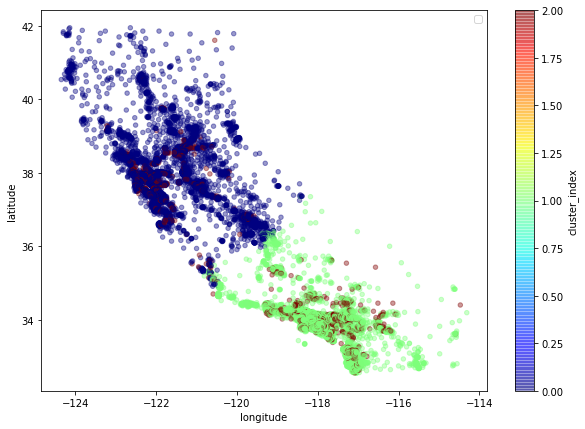

In [0]:
all_data = kmeans(trans_data, 3)
x = sum_squared_error(all_data)
y = std_dev(all_data)
z = find_mean(all_data)

print("Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity")
print("Sum-squared error:")
s = 0
for i in range(len(x)):
  print("Cluster ", str(i+1), ": ", x[i])
  s+=sum(x[i])
print("Average of SSE: ", str(s/(9*len(x))))

print("Standard Deviation:")
s = 0
for i in range(len(y)):
  print("Cluster ", str(i+1), ": ", y[i])
  s+=sum(y[i])
print("Average of ST. D: ", str(s/(9*len(y))))

print("Mean:")
s = 0
for i in range(len(z)):
  print("Cluster ", str(i+1), ": ", z[i])
  s+=sum(z[i])
print("Average of Mean: ", str(s/(9*len(z))))

plot_scatter(data, all_data)

## K = 4

Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity
Sum-squared error:
Cluster  1 :  [2732.12977923 2048.96520569 3239.87644314 1185.63127479  913.98879288
  813.02359791  948.62440459 4309.65892111 1540.13059717]
Cluster  2 :  [1475.14391125 1287.59964289  772.39252432 5159.12573345 4003.38732396
 5122.56400063 3939.21218371 1088.01281501 1149.32927032]
Cluster  3 :  [1309.34061933  922.35502403 7170.90653486 2043.18931163 2648.03480059
 3102.09055787 2604.70524861 3412.58221452 3130.82654685]
Cluster  4 :  [1572.12160266 1625.05398891 7680.47344097 1808.9079835  2077.75012582
 2055.3434542  2190.10378369 2975.43329133 3802.06418599]
Average of SSE:  2607.2244204843346
Standard Deviation:
Cluster  1 :  [0.9520922685674467, 0.82450950726457, 1.0367942980351434, 0.6271958836289041, 0.5506793755697975, 0.5193736969936147, 0.5610163555764943, 1.1957759821305476, 0.7148372089441744]
Cluste

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


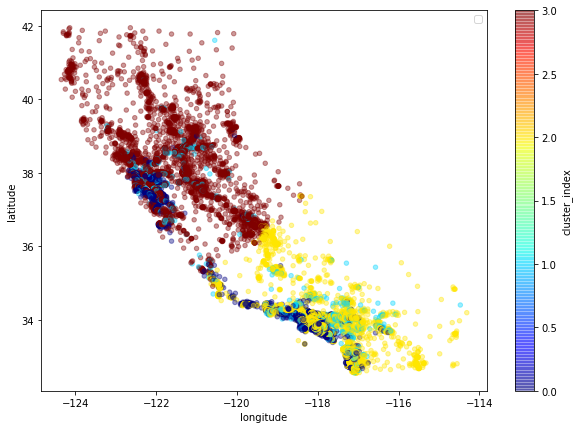

In [0]:
all_data = kmeans(trans_data, 4)
x = sum_squared_error(all_data)
y = std_dev(all_data)
z = find_mean(all_data)

print("Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity")
print("Sum-squared error:")
s = 0
for i in range(len(x)):
  print("Cluster ", str(i+1), ": ", x[i])
  s+=sum(x[i])
print("Average of SSE: ", str(s/(9*len(x))))

print("Standard Deviation:")
s = 0
for i in range(len(y)):
  print("Cluster ", str(i+1), ": ", y[i])
  s+=sum(y[i])
print("Average of ST. D: ", str(s/(9*len(y))))

print("Mean:")
s = 0
for i in range(len(z)):
  print("Cluster ", str(i+1), ": ", z[i])
  s+=sum(z[i])
print("Average of Mean: ", str(s/(9*len(z))))

plot_scatter(data, all_data)

## K = 5

Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity
Sum-squared error:
Cluster  1 :  [1488.08533651 1547.59103053 7191.19373071 1293.89966654 1480.5116905
 1517.28019596 1560.73410048 2808.57121997 3615.01303534]
Cluster  2 :  [1213.14555265  864.87544979 6351.29548353 1265.0830482  1581.24786539
 2028.82824539 1583.43587331 3200.66243563 2958.93462075]
Cluster  3 :  [2359.89291766 2082.12252204 1386.46856352 1750.04559982 1507.71227967
 1699.56874039 1440.91867185 1649.43320524 1829.29986918]
Cluster  4 :  [2556.21520358 1920.66716618 2923.42260078  879.89641348  638.87360183
  590.75135367  669.52183669 4085.75905362 1406.01337861]
Cluster  5 :  [ 252.27298202  217.29980922  105.62211159 1597.55801117 1084.20761034
 2036.92708621 1116.89293196  189.30605563  200.67539673]
Average of SSE:  1816.1718567525315
Standard Deviation:
Cluster  1 :  [0.4716646417079719, 0.4810026887288027, 1.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


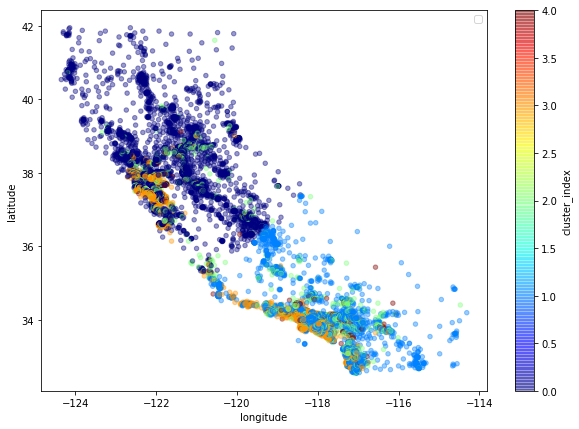

In [0]:
all_data = kmeans(trans_data, 5)
x = sum_squared_error(all_data)
y = std_dev(all_data)
z = find_mean(all_data)

print("Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity")
print("Sum-squared error:")
s = 0
for i in range(len(x)):
  print("Cluster ", str(i+1), ": ", x[i])
  s+=sum(x[i])
print("Average of SSE: ", str(s/(9*len(x))))

print("Standard Deviation:")
s = 0
for i in range(len(y)):
  print("Cluster ", str(i+1), ": ", y[i])
  s+=sum(y[i])
print("Average of ST. D: ", str(s/(9*len(y))))

print("Mean:")
s = 0
for i in range(len(z)):
  print("Cluster ", str(i+1), ": ", z[i])
  s+=sum(z[i])
print("Average of Mean: ", str(s/(9*len(z))))

plot_scatter(data, all_data)

## K = 6

Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity
Sum-squared error:
Cluster  1 :  [1925.46831808 1648.54785528 1209.51726798 1753.29569077 1500.43749797
 1651.33571137 1409.95043397 1411.47986809 1624.69904428]
Cluster  2 :  [2175.83853747 1623.05908127 2561.87081209  909.59597355  617.02922672
  546.1517172   650.68833456 3805.41507808 1397.65104526]
Cluster  3 :  [ 205.6442378   182.4258868    74.25431135 1271.53906358  894.58968122
 1781.73623923  905.49378049  151.24541591  155.6855825 ]
Cluster  4 :  [1078.78871118  745.07877528 6062.65414986 1296.96698654 1650.16714122
 2090.85611979 1658.89929327 3063.69745046 2936.04039633]
Cluster  5 :  [1126.21107194 1398.74664917 1269.23285394  976.2874679  1065.18973981
 1146.76046745 1151.14253502 1869.38065289 1610.20085544]
Cluster  6 :  [ 521.22811574  488.53095871 1263.12595832  488.01650723  670.35652366
  615.01532588  705.4574868

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


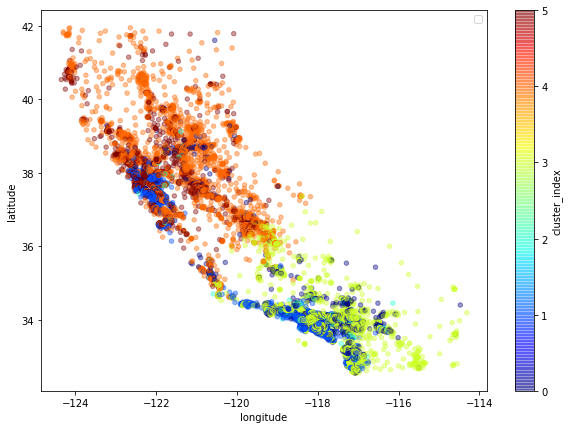

In [0]:
all_data = kmeans(trans_data, 6)
x = sum_squared_error(all_data)
y = std_dev(all_data)
z = find_mean(all_data)

print("Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity")
print("Sum-squared error:")
s = 0
for i in range(len(x)):
  print("Cluster ", str(i+1), ": ", x[i])
  s+=sum(x[i])
print("Average of SSE: ", str(s/(9*len(x))))

print("Standard Deviation:")
s = 0
for i in range(len(y)):
  print("Cluster ", str(i+1), ": ", y[i])
  s+=sum(y[i])
print("Average of ST. D: ", str(s/(9*len(y))))

print("Mean:")
s = 0
for i in range(len(z)):
  print("Cluster ", str(i+1), ": ", z[i])
  s+=sum(z[i])
print("Average of Mean: ", str(s/(9*len(z))))

plot_scatter(data, all_data)

## K = 7

Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity
Sum-squared error:
Cluster  1 :  [1003.87023974  651.2803056  5524.08228651 1160.06395767 1549.87474477
 1995.2569709  1551.38628364 2423.31905112 2130.02213736]
Cluster  2 :  [ 227.73227024  106.55649561 2468.42295656  750.85329765  554.74016942
  500.52884156  576.1075873  3267.53232659 1688.00534812]
Cluster  3 :  [ 649.18885532  624.09067783 1242.64906856  351.60849815  477.33858522
  454.49023706  502.90038559  799.68791676 1138.67538199]
Cluster  4 :  [1785.40808139 1542.97185521 1120.43678357 1718.82894057 1427.13247276
 1593.87766956 1351.34909547 1350.15373383 1495.04291047]
Cluster  5 :  [ 999.31003644 1256.27561206 1019.85600198  822.10117278  927.53643663
 1014.67218031 1001.84082049 1320.00645459  953.30267062]
Cluster  6 :  [ 202.57120286  180.8077157    73.63345692 1262.18952003  883.85708374
 1776.31573063  896.5456923

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


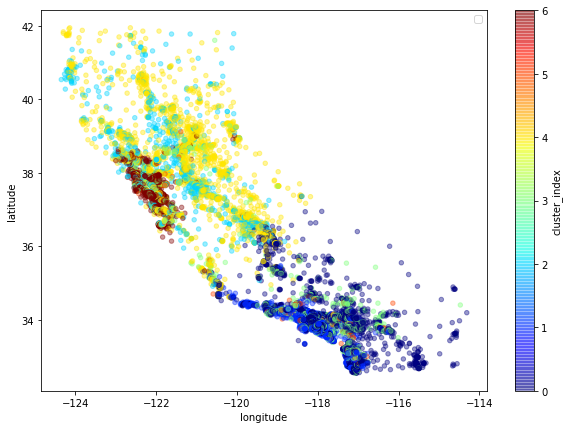

In [0]:
all_data = kmeans(trans_data, 7)
x = sum_squared_error(all_data)
y = std_dev(all_data)
z = find_mean(all_data)

print("Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity")
print("Sum-squared error:")
s = 0
for i in range(len(x)):
  print("Cluster ", str(i+1), ": ", x[i])
  s+=sum(x[i])
print("Average of SSE: ", str(s/(9*len(x))))

print("Standard Deviation:")
s = 0
for i in range(len(y)):
  print("Cluster ", str(i+1), ": ", y[i])
  s+=sum(y[i])
print("Average of ST. D: ", str(s/(9*len(y))))

print("Mean:")
s = 0
for i in range(len(z)):
  print("Cluster ", str(i+1), ": ", z[i])
  s+=sum(z[i])
print("Average of Mean: ", str(s/(9*len(z))))

plot_scatter(data, all_data)

## K = 8

Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity
Sum-squared error:
Cluster  1 :  [ 178.40902837  160.8306575    67.04751647 1151.90833964  788.3496121
 1682.19087252  808.05891613  137.85993782  140.20171292]
Cluster  2 :  [ 602.58498716  485.55624222 1717.52509976  645.3835335   666.43354389
 1055.53027192  622.51080949 1079.15202584 1043.56252956]
Cluster  3 :  [ 755.11884349  565.06192535  872.41265175  445.05220842  230.68356981
  228.23037088  245.95259776 1005.23294328  167.32595948]
Cluster  4 :  [1430.52878779 1275.54583801  701.73522436 1089.11379872  957.64066692
 1131.85619543  870.08522751  966.64195097 1109.94043983]
Cluster  5 :  [1335.33137339 1449.3430388  4469.84636808  953.78028599 1086.85231179
 1155.70524371 1133.51546653 1404.90856429  791.96211359]
Cluster  6 :  [ 732.1326689   517.12157348 2862.58172847  371.11681302  519.72394562
  799.38209631  548.37883815

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


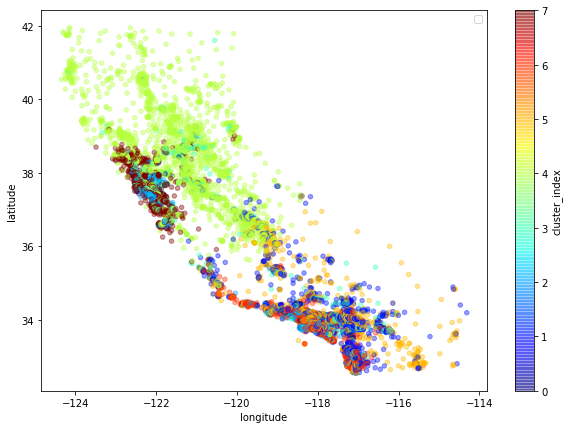

In [0]:
all_data = kmeans(trans_data, 8)
x = sum_squared_error(all_data)
y = std_dev(all_data)
z = find_mean(all_data)

print("Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity")
print("Sum-squared error:")
s = 0
for i in range(len(x)):
  print("Cluster ", str(i+1), ": ", x[i])
  s+=sum(x[i])
print("Average of SSE: ", str(s/(9*len(x))))

print("Standard Deviation:")
s = 0
for i in range(len(y)):
  print("Cluster ", str(i+1), ": ", y[i])
  s+=sum(y[i])
print("Average of ST. D: ", str(s/(9*len(y))))

print("Mean:")
s = 0
for i in range(len(z)):
  print("Cluster ", str(i+1), ": ", z[i])
  s+=sum(z[i])
print("Average of Mean: ", str(s/(9*len(z))))

plot_scatter(data, all_data)

## K = 9

Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity
Sum-squared error:
Cluster  1 :  [  51.83724024   62.06413249 1990.86814866  466.45813633  423.95768716
  390.70636774  456.17260601 2512.49662469 1157.60011812]
Cluster  2 :  [ 169.68870565   81.15793111 1798.70457559  608.96657307  416.42157743
  358.38703361  429.30981469 2776.35300457 1145.96324408]
Cluster  3 :  [ 401.50724518  513.09320197 1097.74476872  571.76528094  608.6588552
  653.62248961  645.39530145  947.80138737  983.58664824]
Cluster  4 :  [ 404.45432196  281.37597208 1145.21405508  404.79142597  537.82910773
  765.55912256  560.99409385 1521.17531235 1623.82370769]
Cluster  5 :  [1023.31733736 1041.96755683 3528.89199714  394.23392648  504.11066959
  542.77718747  537.29145907 1091.59204926 1047.93758891]
Cluster  6 :  [862.94476656 735.38261556 436.86275079 752.3831679  645.19242637
 835.93900442 565.09722416 745.05

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


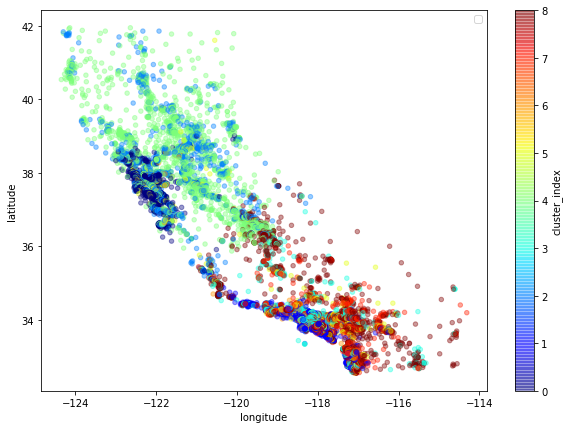

In [0]:
all_data = kmeans(trans_data, 9)
x = sum_squared_error(all_data)
y = std_dev(all_data)
z = find_mean(all_data)

print("Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity")
print("Sum-squared error:")
s = 0
for i in range(len(x)):
  print("Cluster ", str(i+1), ": ", x[i])
  s+=sum(x[i])
print("Average of SSE: ", str(s/(9*len(x))))

print("Standard Deviation:")
s = 0
for i in range(len(y)):
  print("Cluster ", str(i+1), ": ", y[i])
  s+=sum(y[i])
print("Average of ST. D: ", str(s/(9*len(y))))

print("Mean:")
s = 0
for i in range(len(z)):
  print("Cluster ", str(i+1), ": ", z[i])
  s+=sum(z[i])
print("Average of Mean: ", str(s/(9*len(z))))

plot_scatter(data, all_data)

## K = 10
 For k = 2 to k = 10, the sum-squared-error (SSE) and standard deviation appears to decrease together, suggesting that k = 10 cluster data may be best to use.

Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity
Sum-squared error:
Cluster  1 :  [ 325.71025789  427.1774783  1009.73129084  569.75942023  600.40669059
  613.56710963  624.64898565 1009.52054048 1096.87492555]
Cluster  2 :  [  57.06744787   71.63788861 1747.69667394  323.87693796  403.34882671
  361.67703023  426.70508316 1049.75750348 1193.18493334]
Cluster  3 :  [ 264.90877223  167.17450344 1197.84785215  594.02333284  555.5157637
  775.35309728  470.60812282  943.44411411 1067.68039355]
Cluster  4 :  [786.19672272 672.7839109  392.95316012 710.2864535  577.04464551
 775.66447243 506.01356196 642.47595142 662.48510072]
Cluster  5 :  [1029.75996607 1070.8580218  3245.20440558  382.71682248  475.12369254
  516.92767222  500.75551449  952.18604392  611.56071221]
Cluster  6 :  [ 200.37241049   90.87674526 1705.85807055  412.27499905  380.23531315
  315.03782472  389.6837493  1075.721

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


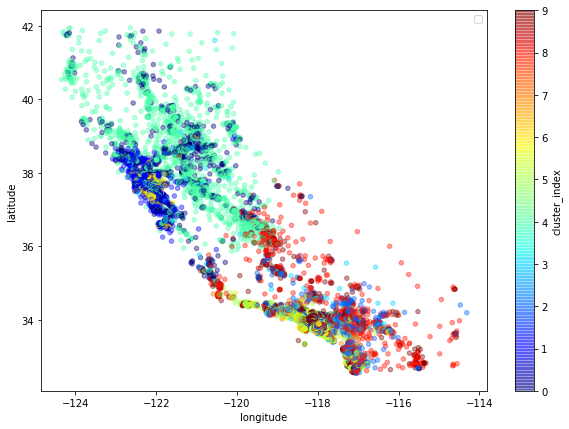

In [0]:
all_data = kmeans(trans_data, 10)
x = sum_squared_error(all_data)
y = std_dev(all_data)
z = find_mean(all_data)

print("Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity")
print("Sum-squared error:")
s = 0
for i in range(len(x)):
  print("Cluster ", str(i+1), ": ", x[i])
  s+=sum(x[i])
print("Average of SSE: ", str(s/(9*len(x))))

print("Standard Deviation:")
s = 0
for i in range(len(y)):
  print("Cluster ", str(i+1), ": ", y[i])
  s+=sum(y[i])
print("Average of ST. D: ", str(s/(9*len(y))))

print("Mean:")
s = 0
for i in range(len(z)):
  print("Cluster ", str(i+1), ": ", z[i])
  s+=sum(z[i])
print("Average of Mean: ", str(s/(9*len(z))))

plot_scatter(data, all_data)

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



So far based on the sum-squared-error and standard deviation, k = 10 achieved the best averages. Hence, we will be asssuming k = 10 scatterplot and data to describe the California Housing Crisis. The California Housing Crisis is a recurring problem where many residents of California leave many cities within because of such high costs to maintain cost of living. We could see some problems regarding this by seeing some concentrated scatter plots on the k = 10 graph. The clusters in the mid-west portion and southern portion shows the potential diverse differences in economic features that may correlate to high cost of living. One observation is the concentrations of all the growing startups, companies, and corporations in the cities. With growing industry, standards of living rise and taxes rise to further development in the cities. One possible solution to the California Housing Crisis could be to deconcentrate and spread the growth of cities to other parts of California. This could potentially spread the rise of cost to other parts of California. Another solution could be to build houses to other surrounding parts of the growing cities. This could lessen the competition to housing costs and broaden the concentration of costs.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 3:...".

Best of luck and have fun!